Text(0, 0.5, 'variances_squqared')

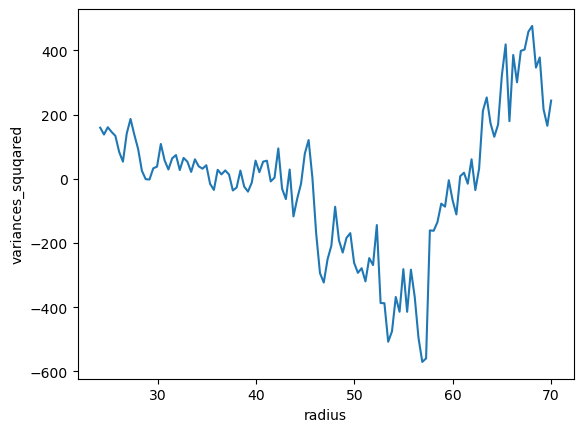

In [2]:
import calc
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(calc)
from calc import Hyperuniform_helper

file_name = 'positions.txt'
data = np.loadtxt(file_name)
rho, box_length, volume_fraction = data[0]
radius = np.linspace(box_length/5.8, box_length/2,120)
scaled_variances = np.zeros(len(radius))
helper = Hyperuniform_helper(radius[0], np.zeros(3), data[1:,], rho)
for i in range(len(radius)):
    helper.set_radius(radius[i])
    r, gr = helper.calculate_radial_distribution(40, 2)
    k_values = np.linspace(2*np.pi/(box_length/2), 2*np.pi/r[1], 1001)
    sk = helper.hankel_transform_2d(gr, r, k_values)
    variance_square = helper.variance_calculations_in_reciprocal_space_2d(sk, k_values)
    scaled_variances[i] = variance_square

plt.plot(radius, scaled_variances)
plt.xlabel("radius")
plt.ylabel("variances_squqared")

In [3]:
print(scaled_variances)

[ 159.37533352  138.11598258  160.74301956  146.14886254  133.87389285
   83.8757132    53.51924782  141.18541236  186.61946572  137.70394326
   93.30678828   25.17365096   -1.00895196   -2.17406882   32.69306616
   38.21088802  108.71861332   57.18290255   29.19637942   64.03986234
   74.01688017   27.38499903   65.17485425   53.51316287   21.6185263
   60.82321193   38.92357018   31.66688027   42.3838998   -15.628499
  -34.50016092   28.07316005   13.85591969   26.17454997   13.30416716
  -36.20780215  -27.17648678   25.71296402  -24.21513184  -39.84005951
  -11.7750245    56.74332523   20.83608081   53.57221832   56.49431878
   -7.9431562     3.5283082    94.76359477  -30.69872112  -63.06874596
   29.0124939  -117.00758801  -61.19414968  -15.2631644    78.75637281
  120.89139595    2.94098114 -171.38656986 -293.88318571 -323.07484756
 -250.56349154 -208.53467145  -86.96266632 -191.10546635 -229.66339281
 -183.84067009 -169.14887125 -261.38149302 -292.86672537 -278.51654905
 -319.546

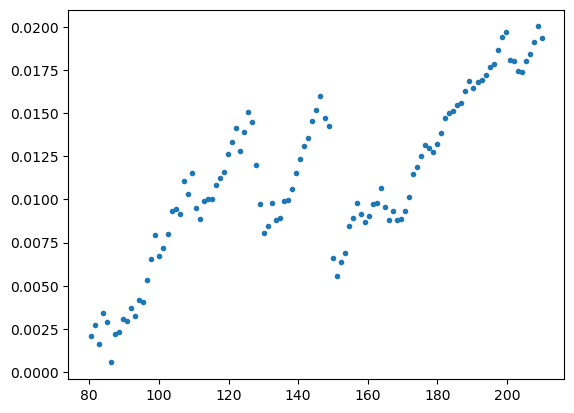

In [77]:
indexes= scaled_variances>0
variances_radius_ratio = (scaled_variances[indexes])/(radius[indexes])**2
plt.plot(radius[indexes], variances_radius_ratio, '.')